<소셜 감성 데이터를 이용한 딥러닝 기반 비트코인 가격 예측 모델 (고광종 외., 2021)>연구에서 사용된 데이터 셋<br>
2020-05-15 00:00 ~ 2021-05-31 23:00까지의 각종 데이터가 담겨 있음

close: Bitcoin 시간봉 종가<br>
dollar: 해당 시간대의 달러 지수<br>
oil: 해당 시간대의 서부 텍사스 유가<br>
AMD: 해당 시간대의 그래픽 카드 제조 업체 AMD 사의 주가<br>
NVDA: 해당 시간대의 그래픽 카드 제조 업체 NVIDIA 사의 주가<br>
gal_p: 해당 시간대의 디씨인사이드 비트코인갤러리의 비트코인 관련 게시글 중 긍정 게시글 의 양<br>
gal_n: 해당 시간대의 디씨인사이드 비트코인갤러리의 비트코인 관련 게시글 중 부정 게시글 의 양 <br>
gal_t: 해당 시간대의 디씨인사이드 비트코인갤러리의 비트코인 관련 게시글 의 양 <br>
twt_p: 해당 시간대의 트위터의 비트코인 관련 게시글 중 긍정 게시글 의 양 <br>
twt_n: 해당 시간대의 트위터의 비트코인 관련 게시글 중 부정 게시글 의 양 <br>
twt_t: 해당 시간대의 트위터의 비트코인 관련 게시글 의 양 <br>
dec_p: 해당 시간대의 디센터의 비트코인 관련 뉴스 중 긍정 뉴스 의 양<br> 
dec_n: 해당 시간대의 디센터의 비트코인 관련 뉴스 중 부정 뉴스 의 양 <br>
dec_t: 해당 시간대의 디센터의 비트코인 관련 뉴스의 양 <br>

In [30]:
import pandas as pd
import numpy as np
#import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import skimage
import shap
%matplotlib inline


In [76]:
data=pd.read_excel('D:/data_set/coindata_set.xlsx',index_col=0)
data_set = data.iloc[:,0:14] # data를 불러 왔을 때 지정하지 않은 컬럼까지 가져와서 기입된 컬럼까지만 가져오기
data_set.head()

,close,dollar,oil,AMD,NVDA,gal_p,gal_n,gal_t,twt_p,twt_n,twt_t,dec_p,dec_n,dec_t
2020-05-15 00:00:00,11744000,100.400002,31.33,54.200001,339.630005,0,0,0,0,0,0,0,0,0
2020-05-15 01:00:00,11676000,100.400002,31.33,54.200001,339.630005,0,0,0,0,0,0,0,0,0
2020-05-15 02:00:00,11616000,100.400002,31.33,54.200001,339.630005,0,0,0,1,0,1,0,0,0
2020-05-15 03:00:00,11658000,100.400002,31.33,54.200001,339.630005,0,0,0,0,0,0,0,0,0
2020-05-15 04:00:00,11635000,100.400002,31.33,54.200001,339.630005,0,0,0,0,0,0,0,0,0


In [32]:
# 데이터 확인
data_set.info() 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9168 entries, 2020-05-15 00:00:00 to 2021-05-31 23:00:00
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   9168 non-null   int64  
 1   dollar  9168 non-null   float64
 2   oil     9168 non-null   float64
 3   AMD     9168 non-null   float64
 4   NVDA    9168 non-null   float64
 5   gal_p   9168 non-null   int64  
 6   gal_n   9168 non-null   int64  
 7   gal_t   9168 non-null   int64  
 8   twt_p   9168 non-null   int64  
 9   twt_n   9168 non-null   int64  
 10  twt_t   9168 non-null   int64  
 11  dec_p   9168 non-null   int64  
 12  dec_n   9168 non-null   int64  
 13  dec_t   9168 non-null   int64  
dtypes: float64(4), int64(10)
memory usage: 1.0 MB


In [33]:
# 기술통계 확인
data_set.describe(include='all')

,close,dollar,oil,AMD,NVDA,gal_p,gal_n,gal_t,twt_p,twt_n,twt_t,dec_p,dec_n,dec_t
count,9.168000e+03,9168.000000,9168.000000,9168.000000,9168.000000,9168.000000,9168.000000,9168.000000,9168.000000,9168.000000,9168.000000,9168.000000,9168.000000,9168.000000
mean,3.117141e+07,92.876885,49.314215,78.245550,506.110079,4.834424,6.028141,10.862565,0.822644,0.680192,1.502836,0.161431,0.023560,0.184991
std,2.236326e+07,2.546071,10.467773,12.728450,75.639388,8.604206,12.563645,20.614808,1.971312,1.884476,3.548291,0.483736,0.161438,0.535859
min,1.053700e+07,89.440002,31.330000,50.099998,339.480011,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.247375e+07,90.779999,40.910000,76.220001,476.519989,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.960100e+07,92.485000,44.110001,81.615002,522.489990,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.113775e+07,93.680000,60.610001,86.150002,550.510010,7.000000,8.000000,15.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,8.128200e+07,100.400002,67.519997,97.250000,645.489990,112.000000,165.000000,268.000000,23.000000,24.000000,39.000000,5.000000,2.000000,5.000000


In [34]:
# 컬럼 별 결측치 확인
data_set.isnull().sum()

close     0
dollar    0
oil       0
AMD       0
NVDA      0
gal_p     0
gal_n     0
gal_t     0
twt_p     0
twt_n     0
twt_t     0
dec_p     0
dec_n     0
dec_t     0
dtype: int64

In [35]:
# close에 대한 다른 변수들의 상관계수를 내림차 순으로 정렬하여 확인
corr_data_set=data_set.corr()
corr_data_set['close'].sort_values(ascending=False)

close     1.000000
oil       0.935422
NVDA      0.623908
gal_p     0.617485
gal_t     0.595700
gal_n     0.554558
twt_t     0.482461
twt_p     0.469824
twt_n     0.416955
AMD       0.341236
dec_n    -0.009399
dec_p    -0.021489
dec_t    -0.022230
dollar   -0.578837
Name: close, dtype: float64

<BarContainer object of 14 artists>

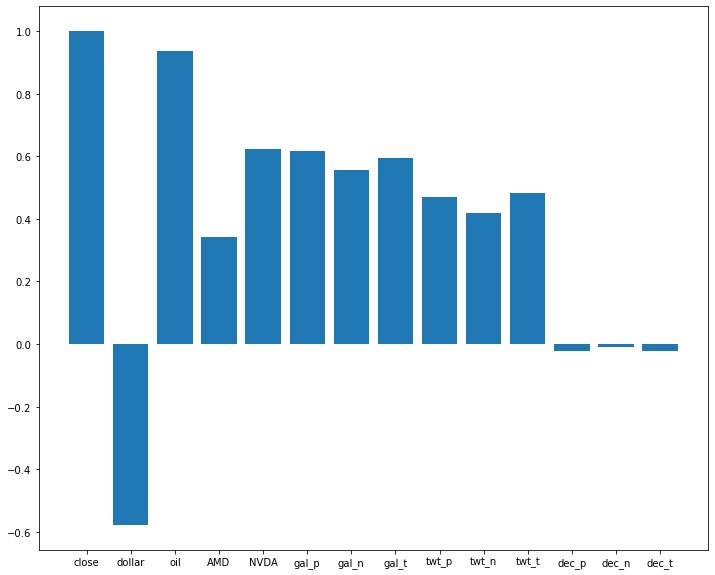

In [36]:
# 분석에 활용할 데이터를 선택하기 위해 조금 더 보기쉽게 시각화
plt.figure(figsize=(12,10))
plt.bar(corr_data_set.index, corr_data_set["close"])

## 해당 시간대 별 비트코인 갤러리의 게시글에 성격, 양과 종가간의 관계

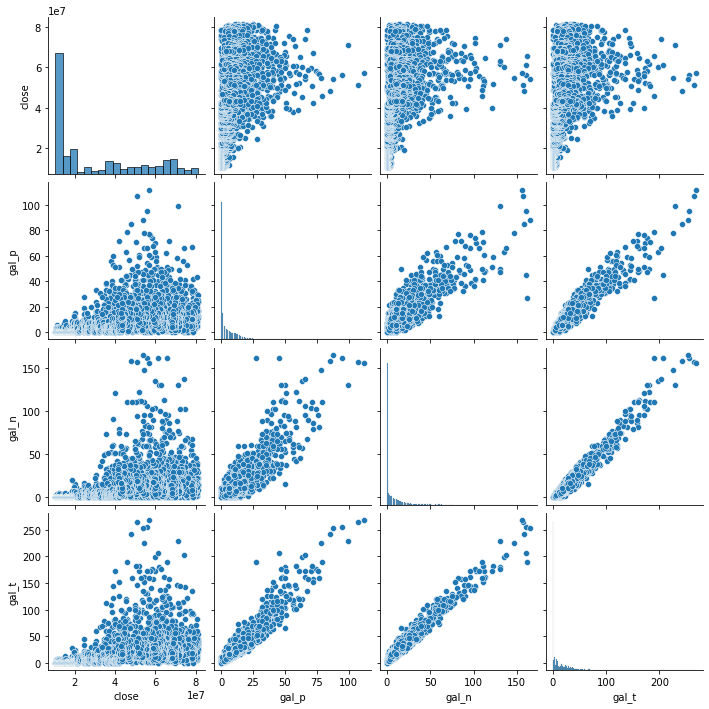

In [37]:
tar_col = data_set[['close','gal_p','gal_n','gal_t']]
sns.pairplot(tar_col)

## 해당 시간대 별 트위터 게시글에 성격, 양과 종가관의 관계

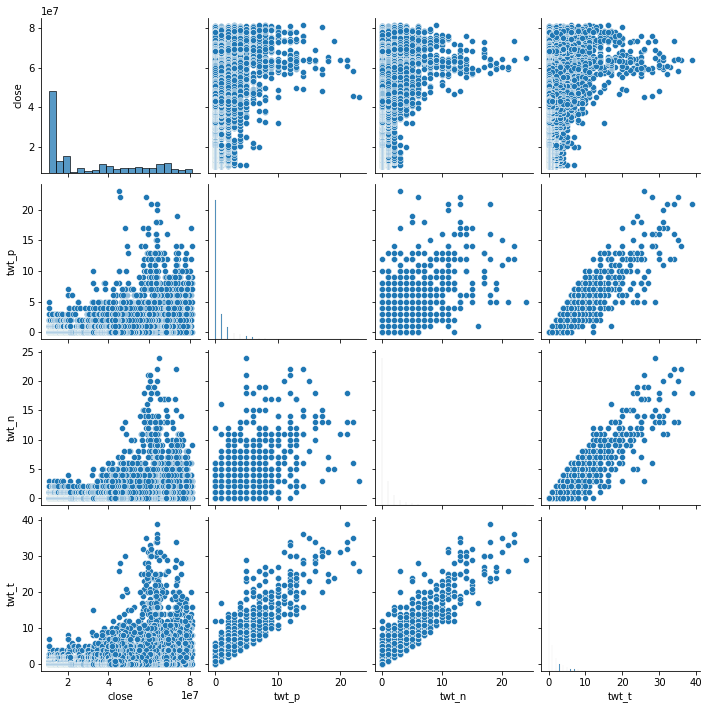

In [38]:
tar_col2 = data_set[['close', 'twt_p','twt_n','twt_t']]
sns.pairplot(tar_col2)
plt.show()

## 해당 시간대 별 디센터에 게시글 성격, 양과 종가관의 관계

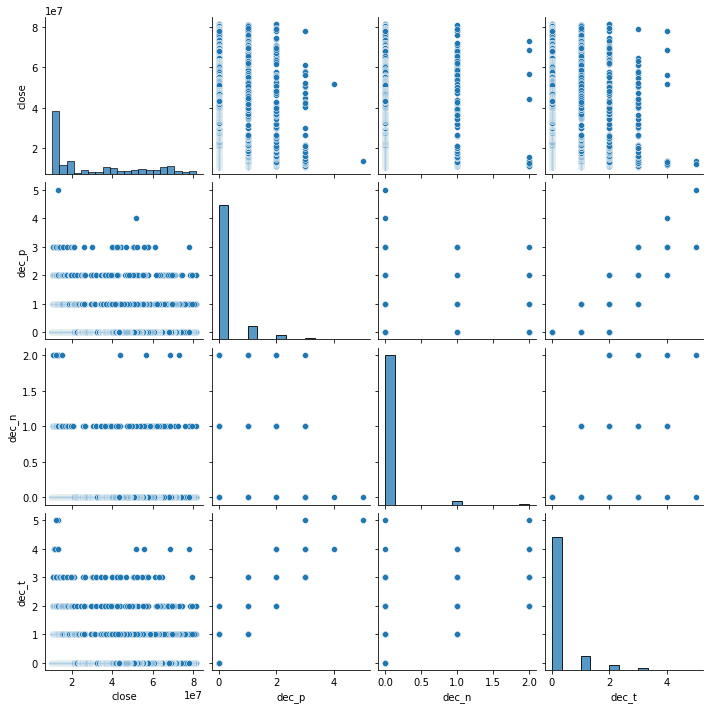

In [39]:
tar_col3 = data_set[['close','dec_p','dec_n','dec_t']]
sns.pairplot(tar_col3)

## 해당 시간대 별 OIL,  AMD, NVIDIA 주가 변화와 종가간의 관계

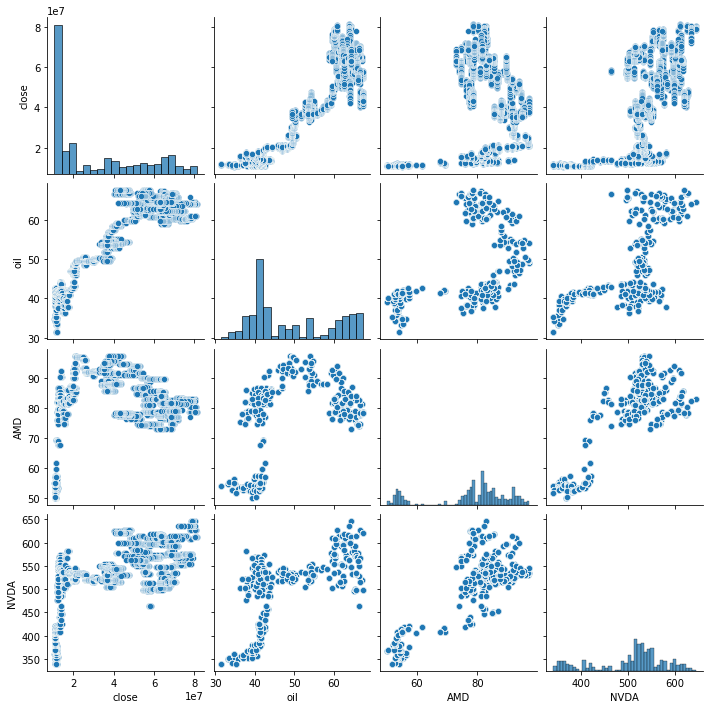

In [40]:
tar_col4 = data_set[['close','oil', 'AMD', 'NVDA']]
sns.pairplot(tar_col4)

In [55]:
# 분석에 활용할 변수 최종 선택
x=data_set[['NVDA', 'gal_p', 'twt_p']]
y=data_set[['close']]

print('\n-----------------독립변수 DATA----------------\n',x,"\n\n")
print('--------종속변수 DATA--------\n',y,"\n\n")


-----------------독립변수 DATA----------------
                            NVDA  gal_p  twt_p
2020-05-15 00:00:00  339.630005      0      0
2020-05-15 01:00:00  339.630005      0      0
2020-05-15 02:00:00  339.630005      0      1
2020-05-15 03:00:00  339.630005      0      0
2020-05-15 04:00:00  339.630005      0      0
...                         ...    ...    ...
2021-05-31 19:00:00  619.520020     18      0
2021-05-31 20:00:00  619.520020     23      3
2021-05-31 21:00:00  619.520020     12      0
2021-05-31 22:00:00  619.520020      6      2
2021-05-31 23:00:00  619.520020     15      0

[9168 rows x 3 columns] 


--------종속변수 DATA--------
                         close
2020-05-15 00:00:00  11744000
2020-05-15 01:00:00  11676000
2020-05-15 02:00:00  11616000
2020-05-15 03:00:00  11658000
2020-05-15 04:00:00  11635000
...                       ...
2021-05-31 19:00:00  43623000
2021-05-31 20:00:00  43385000
2021-05-31 21:00:00  43345000
2021-05-31 22:00:00  43309000
2021-05-31 23:00:0

## Multiple Linear Regression (NVDA, gal_p, twt_p)

In [78]:
from sklearn.model_selection import train_test_split

# 수행마다 train과 test가 바뀔 걸 방지하기 위해 seed 값을 고정시켜서 같은 레코드가 나오도록 함.
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=10) 

# test,train 데이터 크기
print("Train data : ", len(x_train))
print("Test data: ", len(x_test))

Train data :  6417
Test data:  2751


In [79]:
from sklearn.linear_model import LinearRegression

# 선형회귀 객체 생성
model = LinearRegression()
# 학습
model.fit(x_train,y_train)

LinearRegression()

In [80]:
# 학습된 모델에 x_test값을 토대로 예측 y값 구하기
y_predict = model.predict(x_test)

# fig사이즈 
plt.figure(figsize = (10, 5))

r_square = model.score(x_test, y_test)

# 회귀식과 결정계수(R^2) 산출
print('회귀식 :', model.coef_,'Xn +',model.intercept_)
print('결정계수 :', r_square)


회귀식 : [[ 123026.80074374  979109.53310122 1573741.44792148]] Xn + [-37077983.81210455]
결정계수 : 0.5539647679206244


<Figure size 720x360 with 0 Axes>

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).


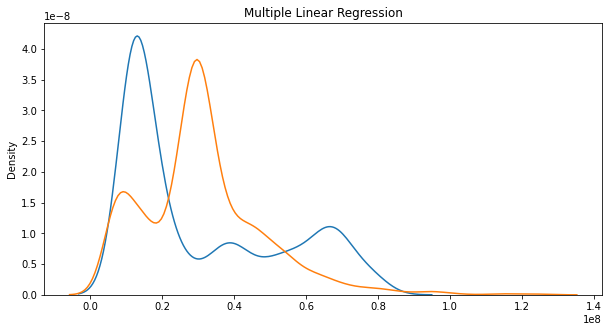

In [81]:
plt.figure(figsize = (10, 5))
ax1 = sns.distplot(y_test, hist = False, label = "Y")
ax2 = sns.distplot(y_predict, hist = False, label = "Y_predict", ax = ax1)
plt.title("Multiple Linear Regression")
plt.show()

Text(0.5, 1.0, 'Multiple Linear Regression')

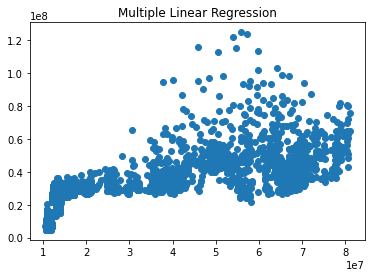

In [46]:
plt.scatter(y_test,y_predict)
plt.title("Multiple Linear Regression")

In [47]:
print(model.score(x_train, y_train))

0.5540204025443807


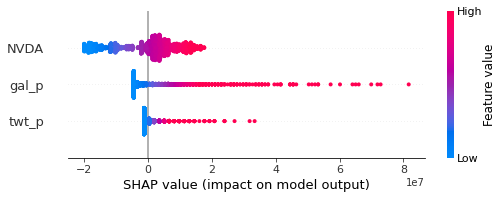

In [21]:
explainer = shap.LinearExplainer(model,x_test)
shap_values = explainer.shap_values(x_test)
shap.summary_plot(shap_values, x_test)

## Multiple Linear Regression (oil,NVDA)

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).


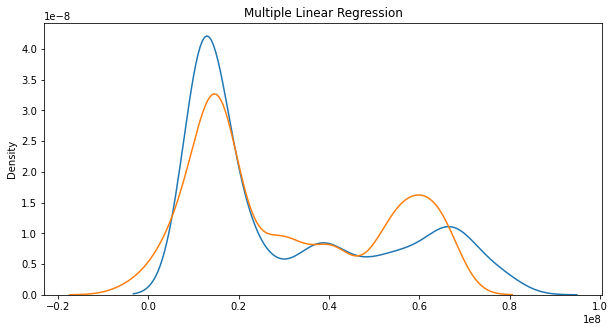

In [70]:
from sklearn.model_selection import train_test_split

x_2 = data_set[['oil','NVDA']]
y_2 = data_set[['close']]

x_train, x_test, y_train, y_test = train_test_split(x_2,y_2, test_size=0.3, random_state=10)

model = LinearRegression()
# 학습
model.fit(x_train,y_train)

y_predict = model.predict(x_test)

# fig사이즈 
plt.figure(figsize = (10, 5))
ax1 = sns.distplot(y_test, hist = False, label = "Y")
ax2 = sns.distplot(y_predict, hist = False, label = "Y_predict", ax = ax1)
plt.title("Multiple Linear Regression")
plt.show()


In [60]:
r_square = model.score(x_test, y_test)

# 회귀식과 결정계수(R^2) 산출
print('회귀식 :', model.coef_,'Xn +',model.intercept_)
print('결정계수 :', r_square)

회귀식 : [[2009527.55027018   -3059.10445596]] Xn + [-66454474.60011975]
결정계수 : 0.8796429873105843


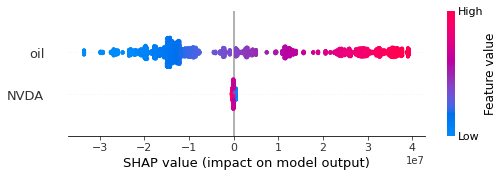

In [61]:
explainer = shap.LinearExplainer(model,x_test)
shap_values = explainer.shap_values(x_test)
shap.summary_plot(shap_values, x_test)

In [62]:
print(model.score(x_train, y_train))

0.873088824313998
